# Task 1.1

In [6]:
import numpy as np
import glob
from PIL import Image
from matplotlib import pyplot as plt

Creating numpyArray

In [7]:
#rezise images and prepare for 
n = 0 #Number of samples 
images = glob.glob("fruits/*.jpg")
newImages = []
wantedX = 28
wantedY = 28

#add data to an array
for img in images: 
    n+=1
    img = Image.open(img)
    newImg = img.resize((wantedX,wantedY))
    #print(f"Image {n} shape:", np.array(newImg).shape)  # Print shape for debugging
    newImages.append(newImg)


#store as a numpy array
numpyArr_fruits = np.array(newImages, dtype=np.uint8)
numpyArr_fruits = normalize_image(numpyArr_fruits)
np.save('samples.npy', numpyArr_fruits)
numpyArr_fruits.shape

Creating PlotSample method

In [8]:

def PlotSample(numpyArray, i):
    color_image = numpyArray[i][0]
    plt.imshow(color_image)
    plt.show()


def plot_images_in_grid(images):
    num_rows = 5
    num_cols = 5

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))

    for i in range(num_rows):
        for j in range(num_cols):
            index = i * num_cols + j
            if index < len(images):
                ax = axes[i, j]
                image = images[index][0]
                    
                # Normalize the image if it's not in the [0, 1] range
                if image.min() < 0 or image.max() > 1:
                    image = (image - image.min()) / (image.max() - image.min())
                
                ax.imshow(image)
               # print(image.shape, "Index of picture ", index ," The [",i,"",j,"] image.")
                ax.axis('off')
    plt.tight_layout()
    plt.show()

The preprocessing

In [9]:
#nomralize values to float range [0, 1]
def normalize_image(images):
    images = images.astype('float32')
    images /=255.0
    return images

#Mean normalization
def center(matrix):
    numpyArr = matrix - np.mean(matrix, axis = 0)
    return numpyArr

#Standardization 
def standardize(matrix):
    numpyArr = center(matrix)/np.std(matrix, axis = 0)
    return numpyArr    

#Decorrelate for whithen method
def decorrelate(X):
    XCentered = center(X)
    cov = XCentered.T.dot(XCentered)/float(XCentered.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    return decorrelated

def whitening(images):
    original_shape = images.shape
    flattened_images = images.reshape(original_shape[0], -1)
    
    # Step 1: Center the data by subtracting the mean
    mean = np.mean(flattened_images, axis=0)
    centered_images = flattened_images - mean

    # Step 2: Calculate the covariance matrix
    covariance_matrix = np.cov(centered_images, rowvar=False)

    # Step 3: Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort eigenvalues in descending order and corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Whitening transformation
    whitened = np.dot(centered_images, eigenvectors)
    whitened /= np.sqrt(eigenvalues + 1e-6)  # Add a small constant to avoid division by zero
    
    # Step 6: Inverse whitening transformation
    reconstructed = np.dot(whitened, eigenvectors.T)
    reconstructed = reconstructed + mean
    
    return reconstructed.reshape(original_shape)


Main

raw data


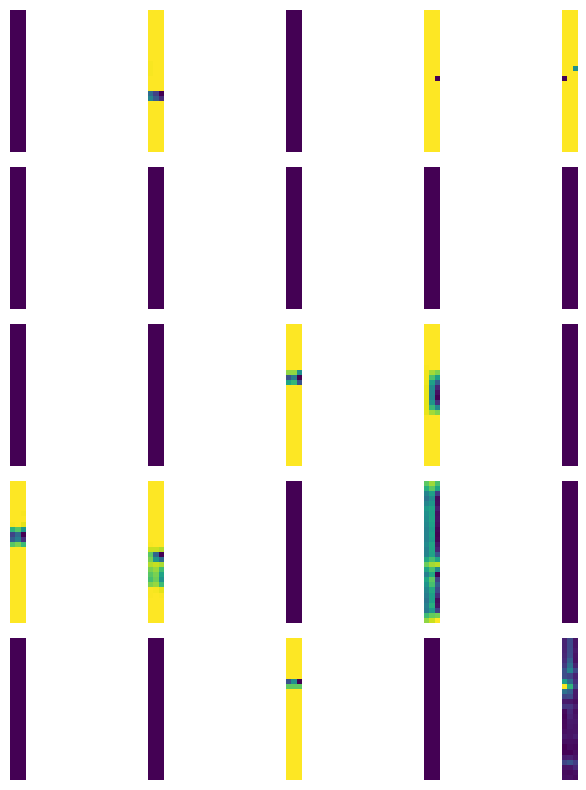

center


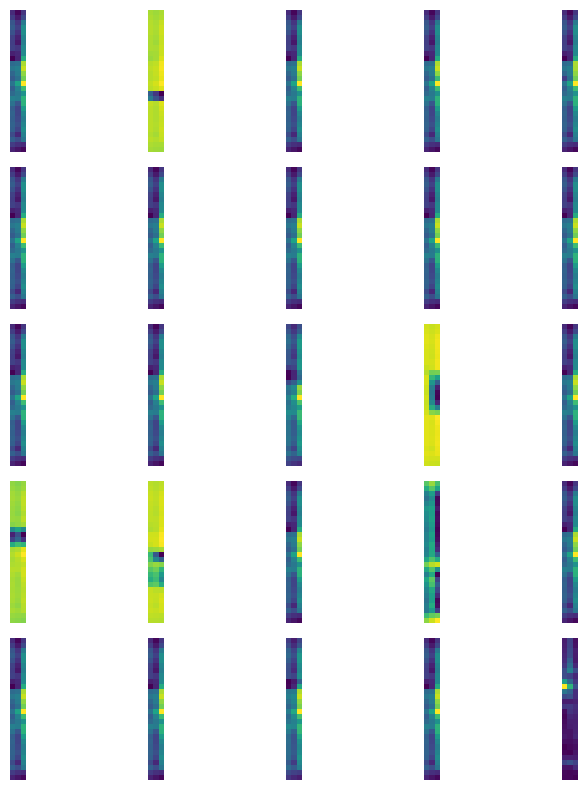

standardize


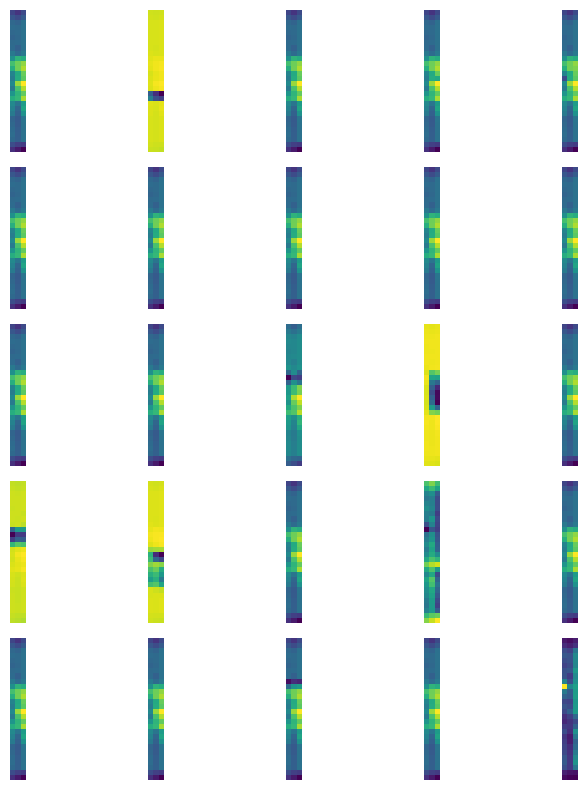

whiten


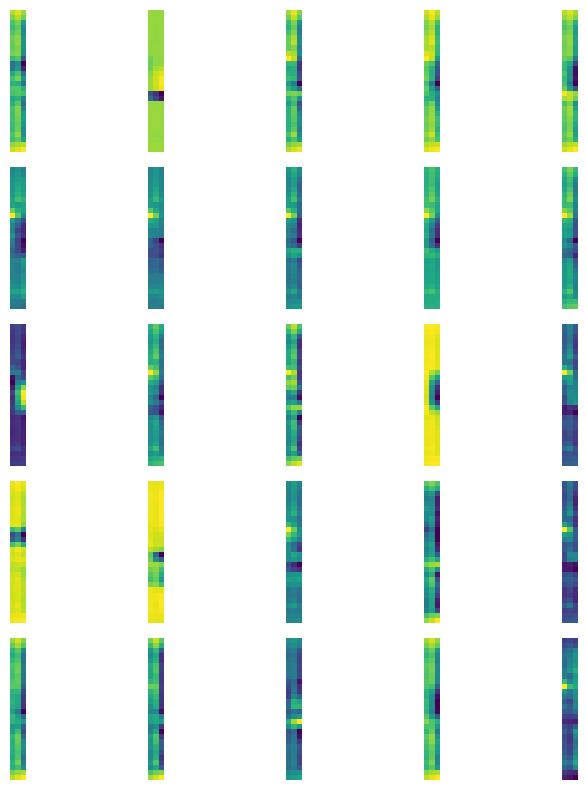

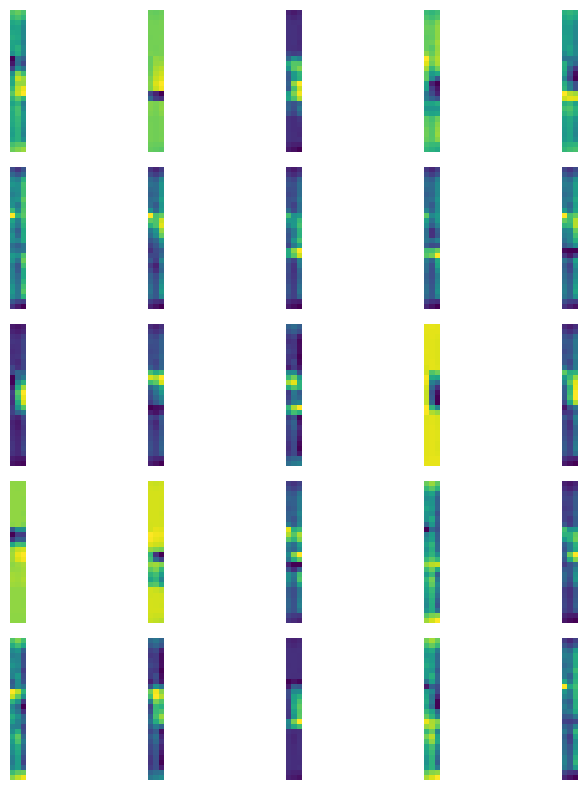

In [10]:
numpyArr = np.load("samples.npy")
#PlotSample(numpyArr, 0) #one raw sample of the collected data
print("raw data")
plot_images_in_grid(numpyArr)
print("center")
plot_images_in_grid(center(numpyArr))
print("standardize")
plot_images_in_grid(standardize(numpyArr))
print("whiten")
plot_images_in_grid(whitening(numpyArr))
plot_images_in_grid(whitening(standardize(center(numpyArr))))

# Task 1.2

Main

In [11]:

#task 1.2
import numpy as np
import matplotlib.pyplot as plt
import random

labels = []
embeddings = []
npDataArrays = np.load("vecs.npy", allow_pickle=True).item() #task 2.1.1

def getPos(npDataArrays, number): #task 2.1.2
    numberPos = list(npDataArrays.keys())[number]
    return npDataArrays[numberPos]

def getNumber(npPosDataArray, number): #task 2.1.2
    numberKey = list(npPosDataArray.keys())[number]
    return np.array(npPosDataArray[number])

def getEmbeddings(npPosDataArray):
    labels = np.array([list(npPosDataArray.keys())[i] for i in range(10)])
    embeddings = [getNumber(npPosDataArray, i) for i in range(10)]
    return labels, embeddings #task 2.1.2

def permuteData(labels, numbers): #task 2.1.3
    prem = np.random.permutation(len(labels))
    labels = labels[prem]
    embeddings = [numbers[i] for i in prem]
    return labels, embeddings

firstPos = getPos(npDataArrays, 0)   
labels, embeddings = getEmbeddings(firstPos)

#Sorted
print(labels)   
print(embeddings[0])

labels, embeddings = permuteData(labels, embeddings) 

#Unsorted task 2.1.3
print(labels)   
print(embeddings[0])

[0 1 2 3 4 5 6 7 8 9]
[[-0.       -0.       -0.       ... -0.       -0.        9.227847]
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]
 ...
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]
 [-0.       -0.       42.14771  ... -0.       -0.       -0.      ]
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]]
[0 3 2 8 4 1 5 9 7 6]
[[-0.       -0.       -0.       ... -0.       -0.        9.227847]
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]
 ...
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]
 [-0.       -0.       42.14771  ... -0.       -0.       -0.      ]
 [-0.       -0.       -0.       ... -0.       -0.       -0.      ]]


# Task 2.1


In [12]:
from keras.datasets import mnist

In [13]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

In [14]:
Xtr.shape

(60000, 28, 28)

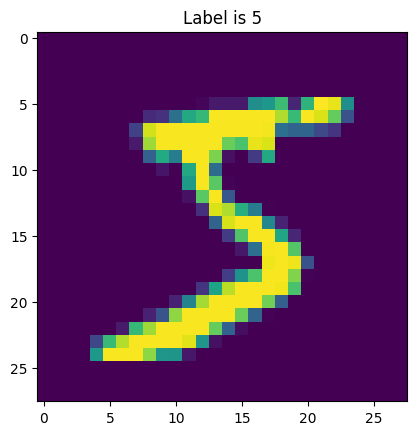

In [15]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


C:\Users\wiklu\AppData\Local\Temp\ipykernel_21252\383047006.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0=plt.subplot(2,2,1)
C:\Users\wiklu\AppData\Local\Temp\ipykernel_21252\383047006.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot(2,2,2)


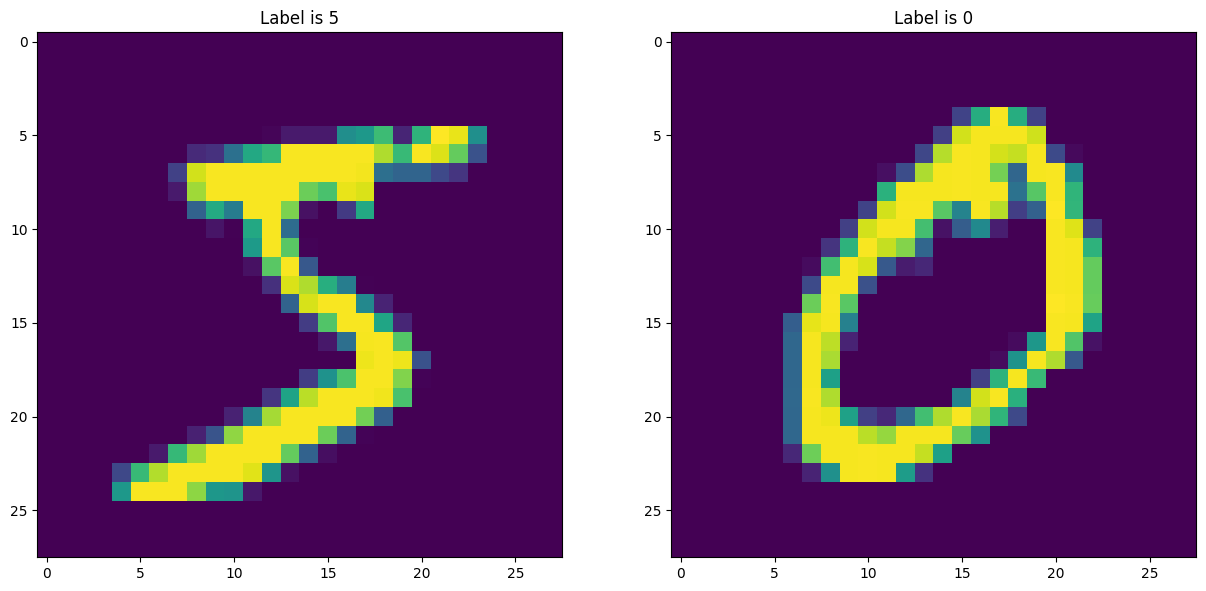

In [16]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [17]:
28*28

784

In [18]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

#bug was in the code line below
#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])
Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype(int) 

Tr_set.shape

(500, 784)

In [19]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

def predictL2(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances = np.sqrt(np.sum((Tr_set - X[i, :])**2, axis=1))  #Added euclidian distance
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index] 
    return Lpred

In [20]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])

Labels_predicted=predict(Test_images)
Labels_predictedL2 = predictL2(Test_images)

print("Accuracy L1:", np.mean(Labels_predicted==L_test))
print("Accuracy L2:", np.mean(Labels_predictedL2==L_test))



# 2.1 tasks below
# 1.BEFORE any changes we had approx 0.265 accuracy
# 2. L_2 give an accuracy of 0.19
# 3. the bug thing (mby need to explain why) new scores: Accuracy L1: 0.811 , Accuracy L2: 0.8294
# 4. 


